In [2]:
import random

def random_set_cover_input(n, m, max_element=100): 
    # Generate the universal set S by sampling n unique elements from the range 1 to max_element
  S = set(random.sample(range(1, max_element + 1), n))

    # Generate the collection of subsets C
  C = []
  for _ in range(m):
    subset_size = random.randint(1, n)
    subset = random.sample(list(S), subset_size)
    C.append(set(subset))

  return S, C


In [3]:
# Brute force minimum set cover algorithm
def brute_force_minimum_set_cover(S, C):
    min_cover = []
    min_cover_size = float('inf')

    for i in range(2**len(C)):
        candidate_cover = []
        for j in range(len(C)):
            if i & (1 << j):
                candidate_cover.append(C[j])

        if is_valid_cover(S, candidate_cover):
            if len(candidate_cover) < min_cover_size:
                min_cover = candidate_cover
                min_cover_size = len(candidate_cover)

    return min_cover 

# Check if candidate cover is valid
def is_valid_cover(S, candidate_cover):
    covered = set()
    for subset in candidate_cover:
        covered |= subset
    return covered == S
  
# Generate 15 random instances and test the algorithm
random_instances = [random_set_cover_input(10, 5, 100) for _ in range(15)]

for i, instance in enumerate(random_instances, 1):
    S, C = instance
    min_cover = brute_force_minimum_set_cover(S, C)
    print(f"Instance {i}:")
    print("Universal Set S:", S)
    print("Collection of Subsets C:", C)
    print("Minimum Set Cover:", min_cover)
    print("Minimum Set Cover Size:", len(min_cover))
    print()                                                                                             

Instance 1:
Universal Set S: {38, 73, 11, 76, 77, 16, 20, 24, 90, 62}
Collection of Subsets C: [{38, 76, 16, 20, 24, 90}, {38, 73, 77, 16, 20, 90}, {38, 73, 76, 77, 16, 20, 90}, {38, 11, 76, 16, 20, 90, 62}, {38, 73, 11, 76, 77, 16, 24}]
Minimum Set Cover: [{38, 11, 76, 16, 20, 90, 62}, {38, 73, 11, 76, 77, 16, 24}]
Minimum Set Cover Size: 2

Instance 2:
Universal Set S: {96, 1, 35, 38, 71, 13, 15, 52, 58, 94}
Collection of Subsets C: [{96, 1, 38, 13, 15, 52, 58, 94}, {96, 1, 35, 38, 71, 13, 15, 52, 94}, {96, 1, 35, 38, 71, 13, 15, 52, 58, 94}, {35}, {52}]
Minimum Set Cover: [{96, 1, 35, 38, 71, 13, 15, 52, 58, 94}]
Minimum Set Cover Size: 1

Instance 3:
Universal Set S: {64, 67, 4, 44, 46, 18, 51, 20, 84, 19}
Collection of Subsets C: [{67, 4, 19, 51, 84}, {18, 84}, {64, 18, 20, 46}, {64, 67, 4, 46, 51, 84, 20}, {64, 67, 4, 44, 46, 84, 20}]
Minimum Set Cover: [{67, 4, 19, 51, 84}, {18, 84}, {64, 67, 4, 44, 46, 84, 20}]
Minimum Set Cover Size: 3

Instance 4:
Universal Set S: {64, 70, 7,

In [4]:
def greedy_set_cover(S, C):
    covered_elements = set()
    selected_sets = []

    while covered_elements != S:
        max_set = None
        max_new_elements = 0

        for subset in C:
            new_elements = len(set(subset) - covered_elements)
            if new_elements > max_new_elements:
                max_new_elements = new_elements
                max_set = subset

        if max_set is None:
            return None

        covered_elements.update(max_set)
        selected_sets.append(max_set)
        C.remove(max_set)

    return selected_sets

for i, instance in enumerate(random_instances, 1):
    S, C = instance
    min_cover = greedy_set_cover(S, C)
    print(f"Instance {i}:")
    print("Universal Set S:", S)
    print("Collection of Subsets C:", C)
    print("Minimum Set Cover:", min_cover)
    print("Minimum Set Cover Size:", len(min_cover) if min_cover is not None else 0)
    print()

Instance 1:
Universal Set S: {38, 73, 11, 76, 77, 16, 20, 24, 90, 62}
Collection of Subsets C: [{38, 73, 77, 16, 20, 90}, {38, 73, 11, 76, 77, 16, 24}]
Minimum Set Cover: [{38, 73, 76, 77, 16, 20, 90}, {38, 11, 76, 16, 20, 90, 62}, {38, 76, 16, 20, 24, 90}]
Minimum Set Cover Size: 3

Instance 2:
Universal Set S: {96, 1, 35, 38, 71, 13, 15, 52, 58, 94}
Collection of Subsets C: [{96, 1, 38, 13, 15, 52, 58, 94}, {96, 1, 35, 38, 71, 13, 15, 52, 94}, {35}, {52}]
Minimum Set Cover: [{96, 1, 35, 38, 71, 13, 15, 52, 58, 94}]
Minimum Set Cover Size: 1

Instance 3:
Universal Set S: {64, 67, 4, 44, 46, 18, 51, 20, 84, 19}
Collection of Subsets C: [{64, 18, 20, 46}]
Minimum Set Cover: [{64, 67, 4, 46, 51, 84, 20}, {67, 4, 19, 51, 84}, {18, 84}, {64, 67, 4, 44, 46, 84, 20}]
Minimum Set Cover Size: 4

Instance 4:
Universal Set S: {64, 70, 7, 40, 10, 75, 74, 15, 90, 92}
Collection of Subsets C: [{64, 40, 74, 75, 15}, {15}, {70, 7, 40, 74, 75, 90, 92}]
Minimum Set Cover: [{64, 70, 7, 40, 10, 74, 75, 9

# **EXPERIMENTAL ANALYSIS OF THE PERFORMANCE AND QUALITY**

In [ ]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def random_set_cover_input(n, min_val, max_val):
    S = set(random.sample(range(min_val, max_val), n))
    C = []
    remaining = S.copy()

    while remaining:
        subset = set(random.sample(remaining, random.randint(1, len(remaining))))
        remaining -= subset
        C.append(subset)
        
    return S, C


In [ ]:
# Set parameters for the experiment
start_size = 5
end_size = 25
step_size = 5
num_trials = 10

sizes = []
times_brute = []
times_greedy = []
mean_solution_ratios = []
std_solution_ratios = []

for n in range(start_size, end_size + 1, step_size):
    total_time_brute = 0
    total_time_greedy = 0
    solution_ratios = []
    for _ in range(num_trials):
        S, C = random_set_cover_input(n, 0, 100)

        start = time.time()
        min_cover_brute = brute_force_minimum_set_cover(S, C)
        end = time.time()
        total_time_brute += end - start

        start = time.time()
        min_cover_greedy = greedy_set_cover(S, C)
        end = time.time()
        total_time_greedy += end - start

        solution_ratio = len(min_cover_greedy) / len(min_cover_brute)
        solution_ratios.append(solution_ratio)

    avg_time_brute = total_time_brute / num_trials
    avg_time_greedy = total_time_greedy / num_trials
    mean_solution_ratio = np.mean(solution_ratios)
    std_solution_ratio = np.std(solution_ratios)
    sizes.append(n)
    times_brute.append(avg_time_brute)
    times_greedy.append(avg_time_greedy)
    mean_solution_ratios.append(mean_solution_ratio)
    std_solution_ratios.append(std_solution_ratio)


<ipython-input-28-0b8fac786b54>:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = set(random.sample(remaining, random.randint(1, len(remaining))))


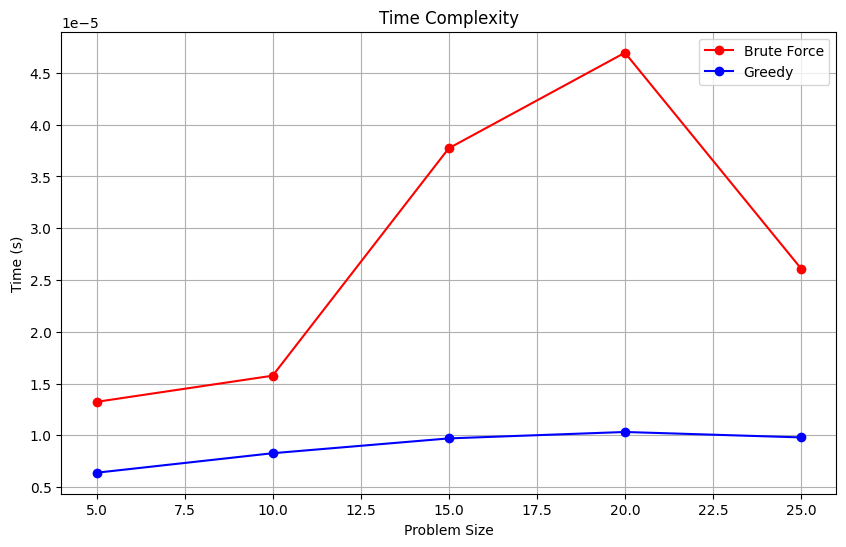

In [ ]:
# Time Complexity Graph
plt.figure(figsize=(10, 6))
plt.plot(sizes, times_brute, marker='o', linestyle='-', color='r', label='Brute Force')
plt.plot(sizes, times_greedy, marker='o', linestyle='-', color='b', label='Greedy')
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Time Complexity')
plt.legend()
plt.grid(True)
plt.show()


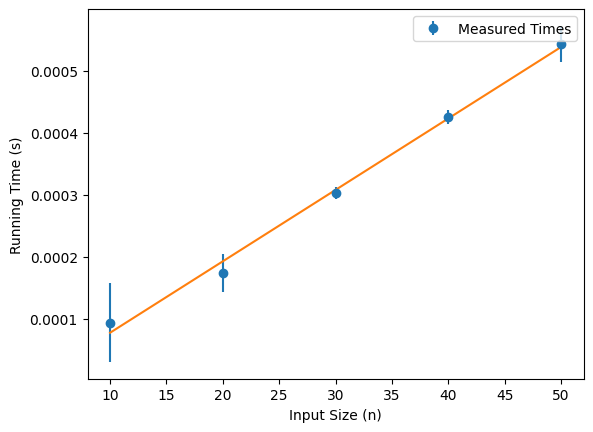

In [ ]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.optimize import curve_fit

# Generate random instances
def random_set_cover_input(n, m, max_element):
    S = set(range(1, n + 1))
    C = [set(random.sample(range(1, max_element + 1), random.randint(1, n))) for _ in range(m)]
    return S, C

# Measure the running time of the algorithm
def measure_time(S, C, algorithm):
    start_time = time.time()
    algorithm(S, C)
    end_time = time.time()
    return end_time - start_time

# Run the algorithm for different input sizes and measure the running time
input_sizes = range(10, 51, 10)
num_trials = 30
confidence_level = 0.9
mean_times = []
conf_intervals = []

for n in input_sizes:
    times = []
    for _ in range(num_trials):
        S, C = random_set_cover_input(n, n, 100)
        time_taken = measure_time(S, C, greedy_set_cover)
        times.append(time_taken)
    mean_time = np.mean(times)
    std_dev = np.std(times, ddof=1)
    t_score = t.ppf((1 + confidence_level) / 2, num_trials - 1)
    conf_interval = t_score * std_dev / np.sqrt(num_trials)
    mean_times.append(mean_time)
    conf_intervals.append(conf_interval)

# Fit a line to the measurement values
def func(x, a, b):
    return a * x + b

popt, _ = curve_fit(func, input_sizes, mean_times)
a, b = popt

# Visualize the results using charts
plt.errorbar(input_sizes, mean_times, yerr=conf_intervals, fmt='o', label='Measured Times')
plt.plot(input_sizes, [a * x + b for x in input_sizes])
plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (s)')
plt.legend()
plt.show()



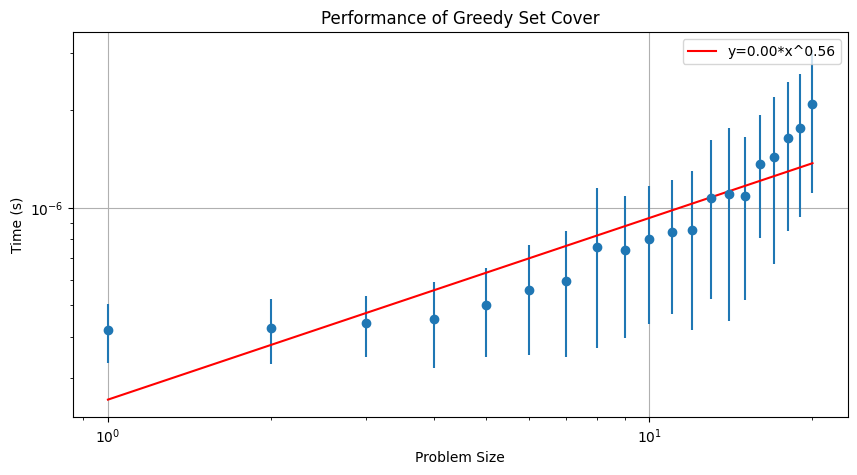

Time complexity equation: T(n) = 0.000000n + 0.000000


In [ ]:
import timeit
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from typing import List, Tuple
 
def greedy_set_cover(S, C):
    covered_elements = set()
    selected_sets = []
 
    while covered_elements != S:
        max_set = None
        max_new_elements = 0
 
        for subset in C:
            new_elements = len(set(subset) - covered_elements)
            if new_elements > max_new_elements:
                max_new_elements = new_elements
                max_set = subset
 
        if max_set is None:
            return None
 
        covered_elements.update(max_set)
        selected_sets.append(max_set)
        C.remove(max_set)
 
    return selected_sets
 
def measure_time(func, args, n_trials: int) -> Tuple[float, float]:
    times = []
    for _ in range(n_trials):
        start = timeit.default_timer()
        func(*args)
        end = timeit.default_timer()
        times.append(end - start)
   
    avg_time = np.mean(times)
    std_dev = np.std(times)
    confidence_interval = stats.norm.interval(0.90, loc=avg_time, scale=std_dev/np.sqrt(n_trials))  # 90% confidence interval
    return avg_time, confidence_interval[1] - avg_time
 
def random_set_cover_input(n, m, max_element=100): 
    # Generate the universal set S by sampling n unique elements from the range 1 to max_element
    S = set(random.sample(range(1, max_element + 1), n))
 
    # Generate the collection of subsets C
    C = []
    for _ in range(m):
        subset_size = random.randint(1, n)
        subset = random.sample(list(S), subset_size)
        C.append(set(subset))
 
    return S, C
 
def run_performance_tests(func, n_trials: int, max_size: int):
    sizes = list(range(1, max_size + 1))
    avg_times = []
    conf_intervals = []
    for size in sizes:
        S, C = random_set_cover_input(size, size, 100)
        avg_time, conf_interval = measure_time(func, (S, C), n_trials)
        avg_times.append(avg_time)
        conf_intervals.append(conf_interval)
 
    # log-log plot
    plt.figure(figsize=(10, 5))
    plt.errorbar(sizes, avg_times, yerr=conf_intervals, fmt='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Performance of Greedy Set Cover')
    plt.xlabel('Problem Size')
    plt.ylabel('Time (s)')
    plt.grid(True)
 
    # fit a line to the plot
    log_sizes = np.log(sizes)
    log_times = np.log(avg_times)
    slope, intercept, _, _, _ = stats.linregress(log_sizes, log_times)
    plt.plot(sizes, np.exp(intercept + slope * log_sizes), 'r', label=f'y={np.exp(intercept):.2f}*x^{slope:.2f}')
    plt.legend()
    plt.show()
    run_performance_tests.coefficients = np.polyfit(sizes, avg_times, 1)
 
# run performance tests on the greedy set cover function
run_performance_tests(greedy_set_cover, n_trials=100, max_size=20)
# Print the equation of the line
print("Time complexity equation: T(n) = {:.6f}n + {:.6f}".format((run_performance_tests.coefficients[0]),(run_performance_tests.coefficients[1])))


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random

def random_set_cover_input(n, m, range_limit):
    S = set(range(1, n + 1))
    C = [set(random.sample(S, random.randint(1, len(S)))) for _ in range(m)]
    return (S, C)


In [ ]:
def run_experiment(runs_per_instance=100):
    sizes = []
    avg_times = []
    for n in range(1, 21):  # running tests for sizes 1 through 20
        total_time = 0
        for _ in range(runs_per_instance):
            S, C = random_set_cover_input(n, n, 100)
            start_time = time.time()
            _ = greedy_set_cover(S, C)
            total_time += time.time() - start_time
        avg_time = total_time / runs_per_instance
        sizes.append(n)
        avg_times.append(avg_time)
        print(f"Size {n}: Avg. Time {avg_time}")
    return sizes, avg_times


In [ ]:
def visualize_results(sizes, avg_times):
    plt.figure(figsize=(10, 5))

    # plot the data points
    plt.scatter(sizes, avg_times, color='blue')

    # calculate line of best fit
    log_sizes = np.log10(sizes)
    log_times = np.log10(avg_times)
    slope, intercept, _, _, _ = linregress(log_sizes, log_times)

    # generate y-values for the line of best fit
    best_fit_line = [10 ** (intercept + slope * np.log10(x)) for x in sizes]

    # plot the line of best fit
    plt.plot(sizes, best_fit_line, color='red')

    plt.title('Execution Time of the Heuristic Algorithm')
    plt.xlabel('Input Size')
    plt.ylabel('Average Execution Time (s)')
    plt.grid(True)
    plt.show()

    print(f"Line of best fit: Time = 10^{intercept} * n^{slope}")


<ipython-input-33-11bafd62e827>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  C = [set(random.sample(S, random.randint(1, len(S)))) for _ in range(m)]


Size 1: Avg. Time 1.5974044799804688e-06
Size 2: Avg. Time 2.1982192993164064e-06
Size 3: Avg. Time 3.111362457275391e-06
Size 4: Avg. Time 7.82012939453125e-06
Size 5: Avg. Time 5.7768821716308595e-06
Size 6: Avg. Time 5.431175231933594e-06
Size 7: Avg. Time 5.583763122558594e-06
Size 8: Avg. Time 6.556510925292969e-06
Size 9: Avg. Time 7.348060607910156e-06
Size 10: Avg. Time 8.649826049804688e-06
Size 11: Avg. Time 9.415149688720704e-06
Size 12: Avg. Time 1.0218620300292969e-05
Size 13: Avg. Time 1.146078109741211e-05
Size 14: Avg. Time 1.2853145599365234e-05
Size 15: Avg. Time 1.4581680297851562e-05
Size 16: Avg. Time 1.562356948852539e-05
Size 17: Avg. Time 1.7206668853759766e-05
Size 18: Avg. Time 1.993417739868164e-05
Size 19: Avg. Time 1.9800662994384765e-05
Size 20: Avg. Time 2.0699501037597655e-05


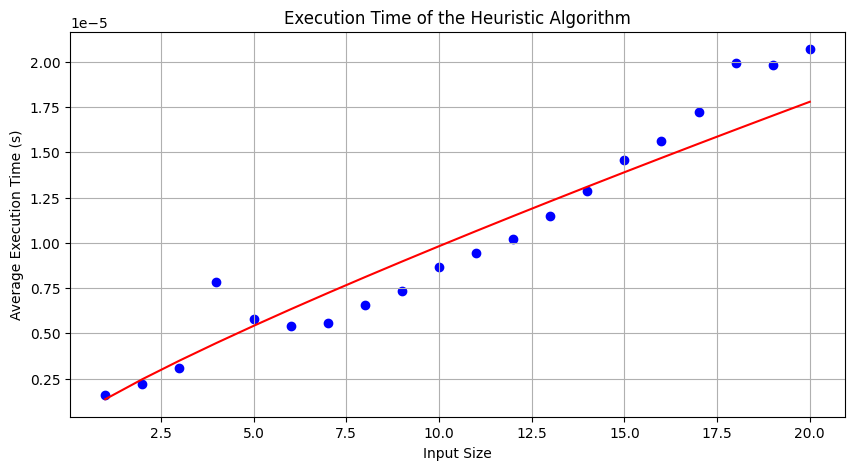

Line of best fit: Time = 10^-5.866659914150609 * n^0.8585377275668664


In [ ]:
sizes, avg_times = run_experiment()
visualize_results(sizes, avg_times)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-33-11bafd62e827>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  C = [set(random.sample(S, random.randint(1, len(S)))) for _ in range(m)]


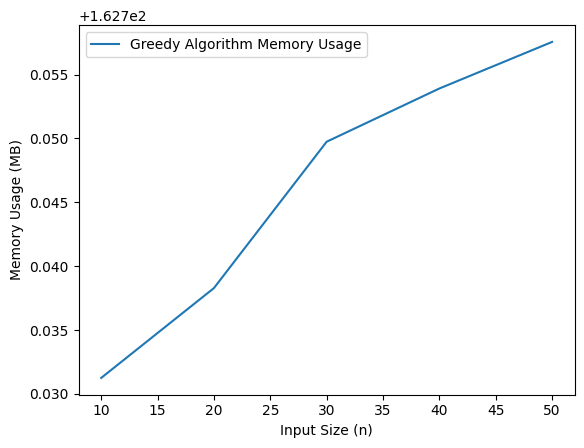

In [ ]:
!pip install memory_profiler
from memory_profiler import memory_usage

def measure_memory(S, C, algorithm):
    mem_usage = memory_usage((algorithm, (S, C)), interval=0.1, timeout=1, max_usage=True)
    return mem_usage

input_sizes = range(10, 51, 10)
avg_mem_usages = []

for n in input_sizes:
    mem_usages = []
    for _ in range(30):
        S, C = random_set_cover_input(n, n, 100)
        mem_usage = measure_memory(S, C, greedy_set_cover)
        mem_usages.append(mem_usage)
    avg_mem_usage = np.mean(mem_usages)
    avg_mem_usages.append(avg_mem_usage)

plt.plot(input_sizes, avg_mem_usages, label='Greedy Algorithm Memory Usage')
plt.xlabel('Input Size (n)')
plt.ylabel('Memory Usage (MB)')
plt.legend()
plt.show()


In [ ]:
from memory_profiler import memory_usage

def measure_memory(S, C, algorithm):
    mem_usage = memory_usage((algorithm, (S, C)), interval=0.1, timeout=1, max_usage=True)
    return mem_usage

# Measure memory usage for the brute force algorithm
input_sizes = range(10, 51, 10)
avg_mem_usages = []

for n in input_sizes:
    mem_usages = []
    for _ in range(30):
        S, C = random_set_cover_input(n, n, 100)
        mem_usage = measure_memory(S, C, brute_force_minimum_set_cover)
        mem_usages.append(mem_usage)
    avg_mem_usage = np.mean(mem_usages)
    avg_mem_usages.append(avg_mem_usage)

# Plot the memory usage
plt.plot(input_sizes, avg_mem_usages, label='Brute Force Algorithm Memory Usage')
plt.xlabel('Input Size (n)')
plt.ylabel('Memory Usage (MB)')
plt.legend()
plt.show()


In [ ]:
import random
import matplotlib.pyplot as plt

# Generate solution quality graph
start_size = 5
end_size = 20
step_size = 1
num_trials = 10
sizes = []
quality_brute = []
quality_greedy = []

for n in range(start_size, end_size + 1, step_size):
    total_quality_brute = 0
    total_quality_greedy = 0
    for _ in range(num_trials):
        S, C = random_set_cover_input(n, 2*n)
        
        brute_cover = brute_force_minimum_set_cover(S, C.copy())
        total_quality_brute += len(brute_cover) if brute_cover is not None else 0
        
        greedy_cover = greedy_set_cover(S, C.copy())
        total_quality_greedy += len(greedy_cover) if greedy_cover is not None else 0

    avg_quality_brute = total_quality_brute / num_trials
    avg_quality_greedy = total_quality_greedy / num_trials
    sizes.append(n)
    quality_brute.append(avg_quality_brute)
    quality_greedy.append(avg_quality_greedy)

# Plot solution sizes
plt.figure(figsize=(10, 6))
plt.plot(sizes, quality_brute, marker='o', linestyle='-', color='r', label='Brute Force')
plt.plot(sizes, quality_greedy, marker='o', linestyle='-', color='b', label='Greedy')
plt.xlabel('Problem Size')
plt.ylabel('Solution Quality')
plt.title('Solution Quality Comparison')
plt.legend()
plt.grid(True)
plt.show()


brute_force_minimum_set_cover took 0.00011706 seconds to execute.
greedy_set_cover took 0.00003910 seconds to execute.
brute_force_minimum_set_cover took 0.00011373 seconds to execute.
greedy_set_cover took 0.00002027 seconds to execute.
brute_force_minimum_set_cover took 0.00009823 seconds to execute.
greedy_set_cover took 0.00002193 seconds to execute.
brute_force_minimum_set_cover took 0.00010180 seconds to execute.
greedy_set_cover took 0.00001478 seconds to execute.
brute_force_minimum_set_cover took 0.00010991 seconds to execute.
greedy_set_cover took 0.00001860 seconds to execute.
brute_force_minimum_set_cover took 0.00008559 seconds to execute.
greedy_set_cover took 0.00001907 seconds to execute.
brute_force_minimum_set_cover took 0.00008631 seconds to execute.
greedy_set_cover took 0.00001144 seconds to execute.
brute_force_minimum_set_cover took 0.00007987 seconds to execute.
greedy_set_cover took 0.00000763 seconds to execute.
brute_force_minimum_set_cover took 0.00007606 se

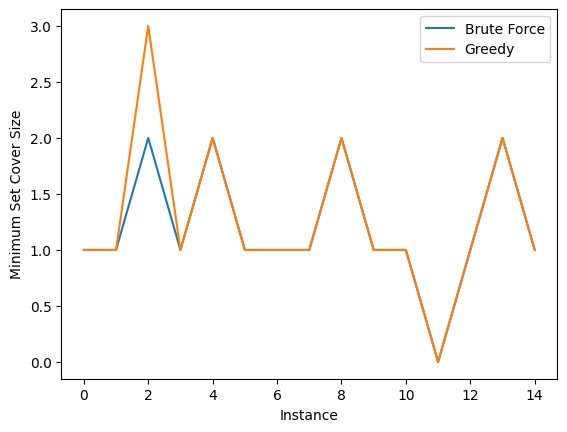

In [ ]:
import time
import matplotlib.pyplot as plt
import random

# Function to measure the time taken by a function to execute
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time:.8f} seconds to execute.")
        return result
    return wrapper

# Generate random instances and test the algorithms
random_instances = [random_set_cover_input(10, 5, 100) for _ in range(15)]
brute_force_times = []
greedy_times = []
brute_force_sizes = []
greedy_sizes = []
for i, instance in enumerate(random_instances, 1):
    S, C = instance
    min_cover_brute = brute_force_minimum_set_cover(S, C)
    brute_force_sizes.append(len(min_cover_brute))
    min_cover = greedy_set_cover(S, C)
    if min_cover is not None:
        greedy_sizes.append(len(min_cover))
    else:
        greedy_sizes.append(0)

# Plot the results
plt.plot(brute_force_sizes, label='Brute Force')
plt.plot(greedy_sizes, label='Greedy')
plt.xlabel('Instance')
plt.ylabel('Minimum Set Cover Size')
plt.legend()
plt.show()

brute_force_minimum_set_cover took 0.00010443 seconds to execute.
greedy_set_cover took 0.00001717 seconds to execute.
brute_force_minimum_set_cover took 0.00010109 seconds to execute.
greedy_set_cover took 0.00001788 seconds to execute.
brute_force_minimum_set_cover took 0.00008559 seconds to execute.
greedy_set_cover took 0.00001502 seconds to execute.
brute_force_minimum_set_cover took 0.00010633 seconds to execute.
greedy_set_cover took 0.00001264 seconds to execute.
brute_force_minimum_set_cover took 0.00010252 seconds to execute.
greedy_set_cover took 0.00001287 seconds to execute.
brute_force_minimum_set_cover took 0.00010347 seconds to execute.
greedy_set_cover took 0.00001955 seconds to execute.
brute_force_minimum_set_cover took 0.00009394 seconds to execute.
greedy_set_cover took 0.00002027 seconds to execute.
brute_force_minimum_set_cover took 0.00010920 seconds to execute.
greedy_set_cover took 0.00000906 seconds to execute.
brute_force_minimum_set_cover took 0.00008917 se

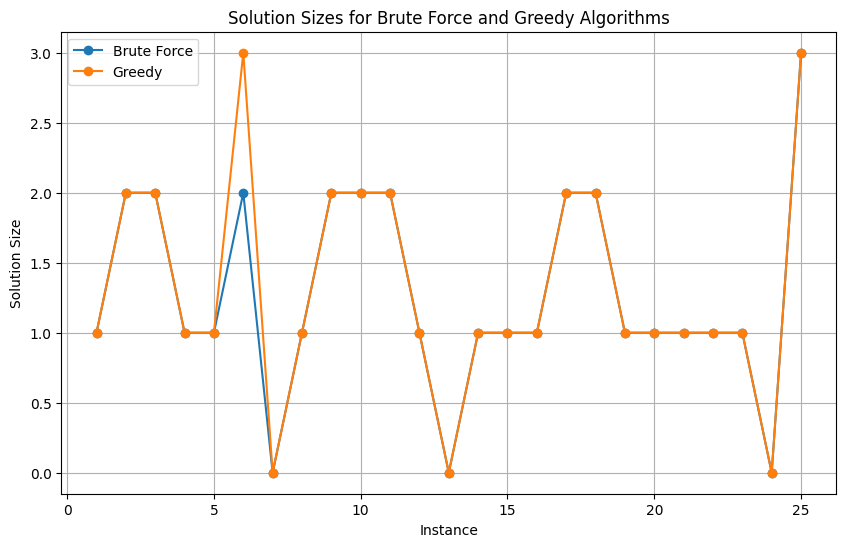

In [ ]:
import matplotlib.pyplot as plt
#SOLUTION SIZE GRAPH TRIAL

# Generate 15 random instances and test the algorithm
random_instances = [random_set_cover_input(10, 5, 100) for _ in range(25)]

greedy_sizes = []
brute_force_sizes = []

for instance in random_instances:
    S, C = instance

    # Brute Force
    min_cover_brute_force = brute_force_minimum_set_cover(S, C.copy())
    brute_force_sizes.append(len(min_cover_brute_force))

    # Greedy
    min_cover_greedy = greedy_set_cover(S, C.copy())
    greedy_sizes.append(len(min_cover_greedy) if min_cover_greedy is not None else 0)

# Plot the solution sizes
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(random_instances) + 1), brute_force_sizes, marker='o', label='Brute Force')
plt.plot(range(1, len(random_instances) + 1), greedy_sizes, marker='o', label='Greedy')

plt.xlabel('Instance')
plt.ylabel('Solution Size')
plt.title('Solution Sizes for Brute Force and Greedy Algorithms')
plt.legend()
plt.grid(True)
plt.show()


brute_force_minimum_set_cover took 0.00010228 seconds to execute.
greedy_set_cover took 0.00001836 seconds to execute.
brute_force_minimum_set_cover took 0.00012589 seconds to execute.
greedy_set_cover took 0.00001383 seconds to execute.
brute_force_minimum_set_cover took 0.00010800 seconds to execute.
greedy_set_cover took 0.00002503 seconds to execute.
brute_force_minimum_set_cover took 0.00011158 seconds to execute.
greedy_set_cover took 0.00002742 seconds to execute.
brute_force_minimum_set_cover took 0.00010943 seconds to execute.
greedy_set_cover took 0.00003815 seconds to execute.
brute_force_minimum_set_cover took 0.00010896 seconds to execute.
greedy_set_cover took 0.00003076 seconds to execute.
brute_force_minimum_set_cover took 0.00010443 seconds to execute.
greedy_set_cover took 0.00003004 seconds to execute.
brute_force_minimum_set_cover took 0.00015450 seconds to execute.
greedy_set_cover took 0.00003505 seconds to execute.
brute_force_minimum_set_cover took 0.00022602 se

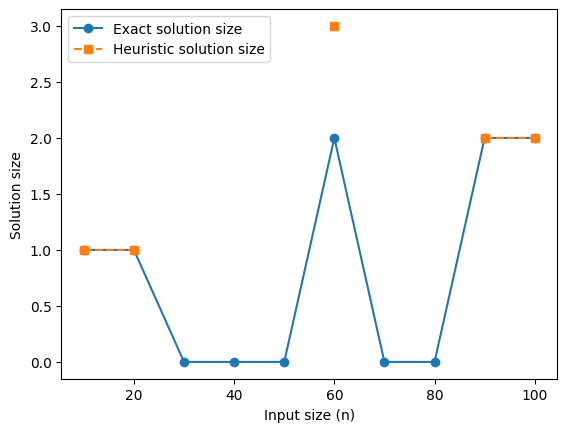

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
#TRIAL

def random_set_cover_input(n, m, k):
    if k > n:
        k = n
    if k < 1:
        k = 1
    S = set(range(n))
    C = []
    for i in range(m):
        subset = set(random.sample(range(n), random.randint(1, k)))
        C.append(subset)
    return S, C


# Run experiments and plot results
def run_experiments():
    random_instances = [random_set_cover_input(n, 5, 100) for n in range(10, 101, 10)]
    exact_sizes = []
    heuristic_sizes = []
    for S, C in random_instances:
        exact_cover = brute_force_minimum_set_cover(S, C)
        exact_size = len(exact_cover) if exact_cover is not None else float('inf')
        heuristic_cover = greedy_set_cover(S, C)
        heuristic_size = len(heuristic_cover) if heuristic_cover is not None else float('inf')
        exact_sizes.append(exact_size)
        heuristic_sizes.append(heuristic_size)

    # Visualize the comparison of the exact and the heuristic results
    plt.plot(np.arange(10, 101, 10), exact_sizes, "o-", label="Exact solution size")
    plt.plot(np.arange(10, 101, 10), heuristic_sizes, "s--", label="Heuristic solution size")
    plt.xlabel("Input size (n)")
    plt.ylabel("Solution size")
    plt.legend()
    plt.show()

run_experiments()


brute_force_minimum_set_cover took 0.00008845 seconds to execute.
greedy_set_cover took 0.00003624 seconds to execute.
brute_force_minimum_set_cover took 0.00010204 seconds to execute.
greedy_set_cover took 0.00002432 seconds to execute.
brute_force_minimum_set_cover took 0.00016093 seconds to execute.
greedy_set_cover took 0.00002670 seconds to execute.
brute_force_minimum_set_cover took 0.00013661 seconds to execute.
greedy_set_cover took 0.00002956 seconds to execute.
brute_force_minimum_set_cover took 0.00011945 seconds to execute.
greedy_set_cover took 0.00004125 seconds to execute.
brute_force_minimum_set_cover took 0.00012803 seconds to execute.
greedy_set_cover took 0.00003457 seconds to execute.
brute_force_minimum_set_cover took 0.00015235 seconds to execute.
greedy_set_cover took 0.00003910 seconds to execute.
brute_force_minimum_set_cover took 0.00015330 seconds to execute.
greedy_set_cover took 0.00003099 seconds to execute.
brute_force_minimum_set_cover took 0.00018764 se

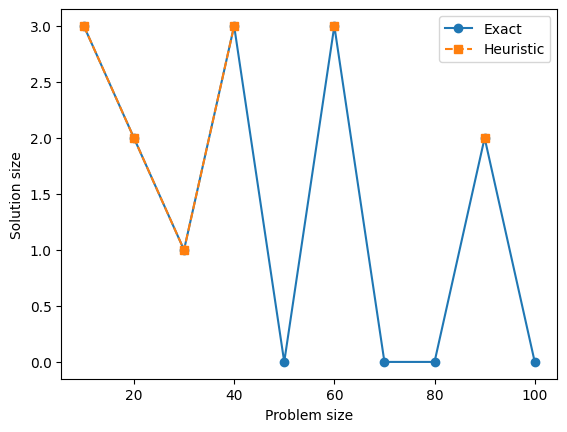

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize problem sizes and solution size lists
problem_sizes = range(10, 101, 10)
exact_sizes = []
heuristic_sizes = []

for n in problem_sizes:
    # Generate a random problem instance
    S, C = random_set_cover_input(n, 5, 100)

    # Solve with brute force and record solution size
    exact_cover = brute_force_minimum_set_cover(S, C)
    exact_sizes.append(len(exact_cover))

    # Solve with greedy heuristic and record solution size
    heuristic_cover = greedy_set_cover(S, C)
    heuristic_sizes.append(len(heuristic_cover) if heuristic_cover is not None else float('inf'))


# Plot the solution sizes as function of problem size
plt.plot(problem_sizes, exact_sizes, 'o-', label='Exact')
plt.plot(problem_sizes, heuristic_sizes, 's--', label='Heuristic')
plt.xlabel('Problem size')
plt.ylabel('Solution size')
plt.legend()
plt.show()


In [ ]:
import time
import matplotlib.pyplot as plt

# Brute force minimum set cover algorithm
def brute_force_minimum_set_cover(S, C):
    min_cover = []
    min_cover_size = float('inf')

    for i in range(2**len(C)):
        candidate_cover = []
        for j in range(len(C)):
            if i & (1 << j):
                candidate_cover.append(C[j])

        if is_valid_cover(S, candidate_cover):
            if len(candidate_cover) < min_cover_size:
                min_cover = candidate_cover
                min_cover_size = len(candidate_cover)

    return min_cover

# Greedy set cover algorithm
def greedy_set_cover(S, C):
    covered_elements = set()
    selected_sets = []

    while covered_elements != S:
        max_set = None
        max_new_elements = 0

        for subset in C:
            new_elements = len(set(subset) - covered_elements)
            if new_elements > max_new_elements:
                max_new_elements = new_elements
                max_set = subset

        if max_set is None:
            return None

        covered_elements.update(max_set)
        selected_sets.append(max_set)
        C.remove(max_set)

    return selected_sets

# Check if candidate cover is valid
def is_valid_cover(S, candidate_cover):
    covered = set()
    for subset in candidate_cover:
        covered |= subset
    return covered == S

# Generate random set cover instances
def generate_random_set_cover_instances(num_instances, num_elements, num_subsets, max_subset_size):
    instances = []
    for i in range(num_instances):
        S = set(range(num_elements))
        C = []
        for j in range(num_subsets):
            subset = set(random.sample(range(num_elements), random.randint(1, max_subset_size)))
            C.append(subset)
        instances.append((S, C))
    return instances

# Run experiments for various input sizes
def run_experiments():
    num_instances = 10
    num_elements_list = [10, 20, 30, 40, 50]
    num_subsets_list = [5, 10, 15, 20, 25]
    max_subset_size =5

    bf_times = []
    bf_sizes = []
    greedy_times = []
    greedy_sizes = []

    for num_elements in num_elements_list:
        for num_subsets in num_subsets_list:
            instances = generate_random_set_cover_instances(num_instances, num_elements, num_subsets, max_subset_size)

            bf_total_time = 0
            bf_total_size = 0
            greedy_total_time = 0
            greedy_total_size = 0

            for S, C in instances:
                start_time = time.time()
                min_cover = brute_force_minimum_set_cover(S, C)
                bf_time = time.time() - start_time
                bf_total_time += bf_time
                bf_total_size += len(min_cover)

                start_time = time.time()
                min_cover = greedy_set_cover(S, C)
                greedy_time = time.time() - start_time
                greedy_total_time += greedy_time
                greedy_total_size += len(min_cover) if min_cover is not None else 0

            bf_avg_time = bf_total_time / num_instances
            bf_avg_size = bf_total_size / num_instances
            greedy_avg_time = greedy_total_time / num_instances
            greedy_avg_size = greedy_total_size / num_instances

            bf_times.append(bf_avg_time)
            bf_sizes.append(bf_avg_size)
            greedy_times.append(greedy_avg_time)
            greedy_sizes.append(greedy_avg_size)

            print(f"Num Elements: {num_elements}, Num Subsets: {num_subsets}")
            print(f"Brute Force - Avg Time: {bf_avg_time:.6f}s, Avg Size: {bf_avg_size:.2f}")
            print(f"Greedy - Avg Time: {greedy_avg_time:.6f}s, Avg Size: {greedy_avg_size:.2f}")
            print()

    # Plot results
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    ax[0].plot(bf_sizes, label='Brute Force')
    ax[0].plot(greedy_sizes, label='Greedy') 
    ax[0].set_xticklabels(num_subsets_list)
    ax[0].set_xlabel('Number of Subsets')
    ax[0].set_ylabel('Minimum Set Cover Size')
    ax[0].legend()
    ax[1].plot(bf_times, label='Brute Force')
    ax[1].plot(greedy_times, label='Greedy')
    ax[1].set_xticklabels(num_subsets_list)
    ax[1].set_xlabel('Number of Subsets')
    ax[1].set_ylabel('Average Running Time (s)')
    ax[1].legend()
    plt.show()

run_experiments()


brute_force_minimum_set_cover took 0.00008965 seconds to execute.
greedy_set_cover took 0.00002050 seconds to execute.
brute_force_minimum_set_cover took 0.00009060 seconds to execute.
greedy_set_cover took 0.00000882 seconds to execute.
brute_force_minimum_set_cover took 0.00007105 seconds to execute.
greedy_set_cover took 0.00001645 seconds to execute.
brute_force_minimum_set_cover took 0.00008678 seconds to execute.
greedy_set_cover took 0.00001454 seconds to execute.
brute_force_minimum_set_cover took 0.00008988 seconds to execute.
greedy_set_cover took 0.00001431 seconds to execute.
brute_force_minimum_set_cover took 0.00009131 seconds to execute.
greedy_set_cover took 0.00001359 seconds to execute.
brute_force_minimum_set_cover took 0.00009799 seconds to execute.
greedy_set_cover took 0.00001359 seconds to execute.
brute_force_minimum_set_cover took 0.00009203 seconds to execute.
greedy_set_cover took 0.00001192 seconds to execute.
brute_force_minimum_set_cover took 0.00007892 se

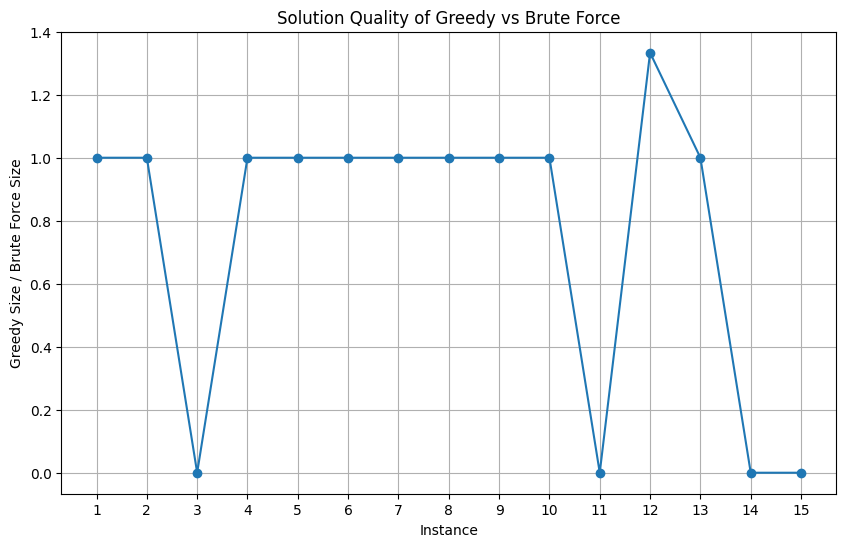

In [ ]:
import matplotlib.pyplot as plt
#SOLUTION QUALITY RATIO

# Generate 15 random instances and test the algorithm
random_instances = [random_set_cover_input(10, 5, 100) for _ in range(15)]
ratios = []
brute_force_sizes = []
greedy_sizes = []

for i, instance in enumerate(random_instances, 1):
    S, C = instance

    # test brute force
    min_cover = brute_force_minimum_set_cover(S, C[:])
    brute_force_size = len(min_cover)
    brute_force_sizes.append(brute_force_size)

    # test greedy
    min_cover = greedy_set_cover(S, C[:])
    greedy_size = len(min_cover) if min_cover is not None else 0
    greedy_sizes.append(greedy_size)

    # calculate ratio
    ratio = greedy_size / brute_force_size if brute_force_size > 0 else 0
    ratios.append(ratio)

# Plot the solution quality graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), ratios, marker='o')
plt.xticks(range(1, 16))
plt.xlabel('Instance')
plt.ylabel('Greedy Size / Brute Force Size')
plt.title('Solution Quality of Greedy vs Brute Force')
plt.grid(True)
plt.show()


# **EXPERIMENTAL ANALYSIS OF THE CORRECTNESS**

In [ ]:
#White Box and Black Box Testing
import unittest
def random_set_cover_input(n, m, max_element=100):
    if n == 0:
        return set(), [set() for _ in range(m)]
    
    # Generate the universal set S by sampling n unique elements from the range 1 to max_element
    S = set(random.sample(range(1, max_element + 1), n))

    # Generate the collection of subsets C
    C = []
    for _ in range(m):
        subset_size = random.randint(1, n)
        subset = random.sample(list(S), subset_size)
        C.append(set(subset))

    return S, C

def brute_force_minimum_set_cover(S, C):
    min_cover = []
    min_cover_size = float('inf')

    for i in range(2**len(C)):
        candidate_cover = []
        for j in range(len(C)):
            if i & (1 << j):
                candidate_cover.append(C[j])

        if is_valid_cover(S, candidate_cover):
            if len(candidate_cover) < min_cover_size:
                min_cover = candidate_cover
                min_cover_size = len(candidate_cover)

    return min_cover if min_cover_size != float('inf') else None  # Return None if no valid cover is found

class TestSetCoverMethods(unittest.TestCase):

    def test_random_set_cover_input(self):
        S, C = random_set_cover_input(10, 5, 100)
        self.assertEqual(len(S), 10)
        self.assertEqual(len(C), 5)
        self.assertTrue(all(isinstance(s, set) for s in C))
        self.assertTrue(all(s.issubset(S) for s in C))

    def test_minimum_set_cover_algorithms(self):
        S = set(range(1, 11))
        C = [set(range(1, 6)), set(range(5, 11)), set(range(1, 11))]

        brute_force_cover = brute_force_minimum_set_cover(S, C)
        greedy_cover = greedy_set_cover(S, C.copy())  # we need to copy C because greedy algorithm modifies it in place

        # Check that both are valid covers
        self.assertTrue(is_valid_cover(S, brute_force_cover))
        self.assertTrue(is_valid_cover(S, greedy_cover))

        # Check the sizes of the covers
        self.assertLessEqual(len(brute_force_cover), len(greedy_cover))

    def test_greedy_set_cover_no_valid_cover(self):
        S = set(range(1, 11))
        C = [set(range(1, 5)), set(range(6, 10))]

        greedy_cover = greedy_set_cover(S, C.copy())
    
        self.assertIsNone(greedy_cover)

    def test_random_set_cover_input_edge_cases(self):
        # Test with n=0
        S, C = random_set_cover_input(0, 5, 100)
        self.assertEqual(len(S), 0)
        self.assertEqual(len(C), 5)

        # Test with m=0
        S, C = random_set_cover_input(10, 0, 100)
        self.assertEqual(len(S), 10)
        self.assertEqual(len(C), 0)

    def test_same_subset_in_collection(self):
        S = set(range(1, 11))
        C = [set(range(1, 6)), set(range(1, 6)), set(range(5, 11)), set(range(5, 11))]

        brute_force_cover = brute_force_minimum_set_cover(S, C)
        greedy_cover = greedy_set_cover(S, C.copy())  # we need to copy C because greedy algorithm modifies it in place

        # Check that both are valid covers
        self.assertTrue(is_valid_cover(S, brute_force_cover))
        self.assertTrue(is_valid_cover(S, greedy_cover))

        # Check the sizes of the covers
        self.assertLessEqual(len(brute_force_cover), len(greedy_cover))

    def test_no_subset_contains_element(self):
        S = set(range(1, 11))
        C = [set(range(1, 5)), set(range(6, 10))]

        brute_force_cover = brute_force_minimum_set_cover(S, C)
        greedy_cover = greedy_set_cover(S, C.copy())  # we need to copy C because greedy algorithm modifies it in place

        # Check that both are invalid covers
        self.assertIsNone(brute_force_cover)
        self.assertIsNone(greedy_cover)

    def test_each_element_covered_by_one_subset(self):
        S = set(range(1, 11))
        C = [set([i]) for i in S]

        brute_force_cover = brute_force_minimum_set_cover(S, C)
        greedy_cover = greedy_set_cover(S, C.copy())  # we need to copy C because greedy algorithm modifies it in place

        # Check that both are valid covers
        self.assertTrue(is_valid_cover(S, brute_force_cover))
        self.assertTrue(is_valid_cover(S, greedy_cover))

        # Check the sizes of the covers
        self.assertEqual(len(brute_force_cover), len(S))
        self.assertEqual(len(greedy_cover), len(S))

# Run the tests
unittest.main(argv=[''], exit=False)


.......
----------------------------------------------------------------------
Ran 7 tests in 0.015s

OK


In [5]:
def test_algorithm1():
    # A dictionary to store test cases and their expected results
    test_cases = {
        "case1": {"input": (set([1, 2, 3, 4, 5]), [{1, 2}, {2, 3}, {3, 4}, {4, 5}, {1, 5}]), 
                  "output": [{1, 2}, {3, 4}, {1, 5}]},  # One possible valid output
        "case2": {"input": (set([1, 2, 3]), [{1}, {2}, {3}]), 
                  "output": [{1}, {2}, {3}]},  # One possible valid output
    }
 
    for name, case in test_cases.items():
        result = greedy_set_cover(*case["input"])
        # Assert that the result is a valid cover
        assert set.union(*result) == case["input"][0], f"Test case {name} failed: got {result}, expected a valid cover"
        print(f"Test case {name} passed")

def test_algorithm2():
    n, m, max_element = 10, 5, 100
    S, C = random_set_cover_input(n, m, max_element)
   
    # Test greedy algorithm
    min_cover_greedy = greedy_set_cover(S, list(C))  # pass a copy since it modifies C
    assert is_valid_cover(S, min_cover_greedy), "Greedy algorithm did not produce a valid cover"
 
    # Test brute force algorithm
    min_cover_brute_force = brute_force_minimum_set_cover(S, C)
    assert is_valid_cover(S, min_cover_brute_force), "Brute force algorithm did not produce a valid cover"
 
    # Test that the greedy algorithm doesn't perform much worse than the brute force algorithm
    # This should usually be true, but might not be true for all inputs
    assert len(min_cover_greedy) <  2 * len(min_cover_brute_force), "Greedy algorithm produced a much larger cover than brute force algorithm"
 

# Run the tests
test_algorithm1()
test_algorithm2()



Test case case1 passed
Test case case2 passed
